In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.shape

(891, 12)

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

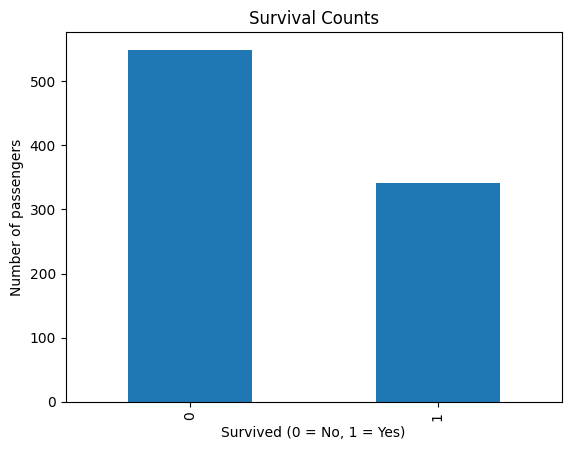

In [7]:
df['Survived'].value_counts().plot(kind='bar')
plt.title("Survival Counts")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of passengers")
plt.show()

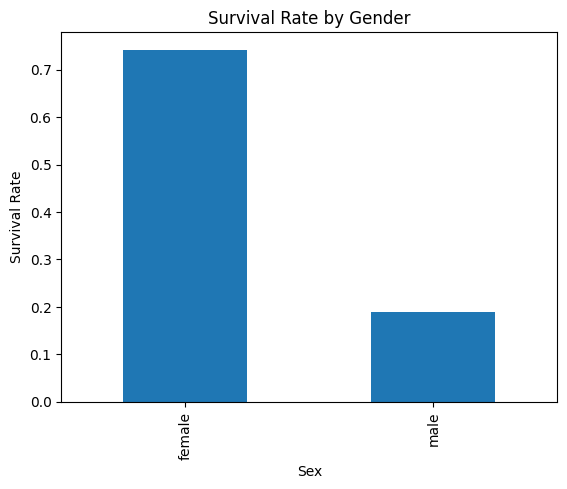

In [8]:
df.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()

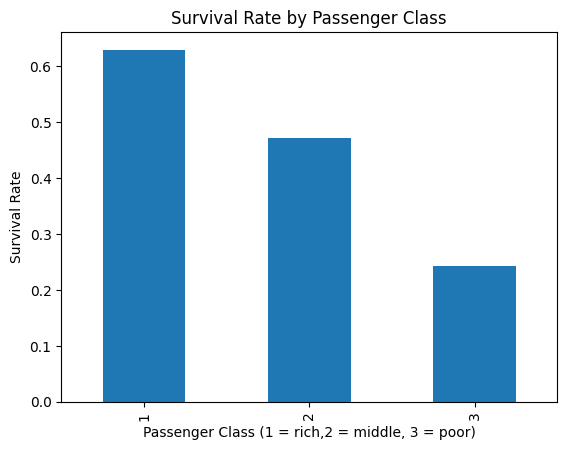

In [9]:
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class (1 = rich,2 = middle, 3 = poor)")
plt.ylabel("Survival Rate")
plt.show()


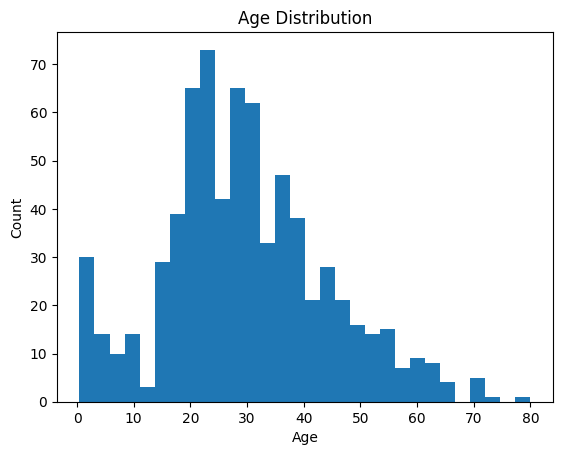

In [10]:
df['Age'].plot(kind='hist',bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [11]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [12]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
df = pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True)
df.drop(['Survived'],axis=1)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,True,False,True
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,False,False,True
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,NaN,False,False,True
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,True,False,False


In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Sex_male         0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [21]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [ ]:
import pandas as pd
df = pd.read_csv("train.csv")
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], errors='ignore')
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Final sanity check
print(df.dtypes)
print(df.isnull().sum())


Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_male         bool
Embarked_Q       bool
Embarked_S       bool
dtype: object
Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [2]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [3]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [4]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8100558659217877

In [5]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm  = confusion_matrix(y_test, y_pred)
cm

array([[90, 15],
       [19, 55]])

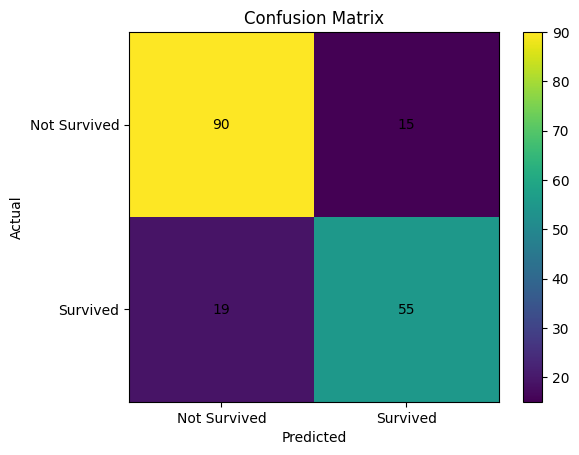

In [6]:
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.yticks([0, 1], ['Not Survived', 'Survived'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center')
plt.show()        


In [7]:
import pandas as pd 
coefficients = pd.DataFrame(
    {"Feature": X.columns, "Coefficient": model.coef_[0]}
).sort_values(by="Coefficient", ascending=False)
coefficients

,Feature,Coefficient
4,Fare,0.002584
1,Age,-0.030572
3,Parch,-0.108325
6,Embarked_Q,-0.113790
2,SibSp,-0.295612
7,Embarked_S,-0.399913
0,Pclass,-0.937548
5,Sex_male,-2.592240
